# Final Results

I saved the f1 scores for all 8 algorithms and here are the results compared

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### Comparing All Algorithms

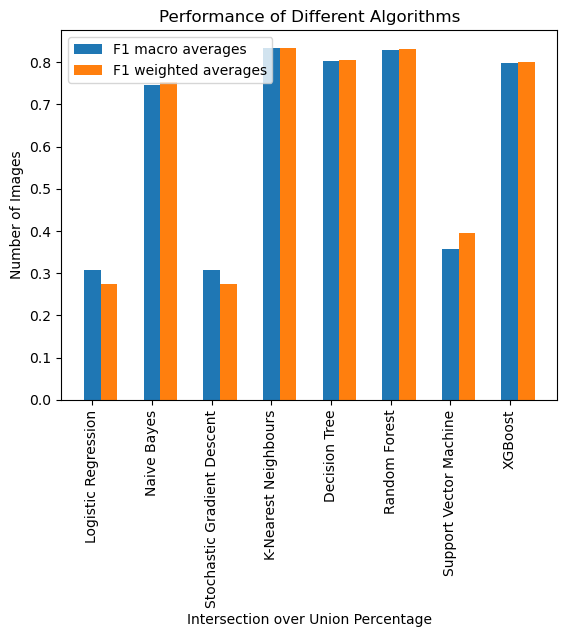

In [3]:
f = open("f1_scores.json", )
f1_scores = json.load(f)
f.close()

x_axis_labels = ['Logistic Regression',
                 'Naive Bayes',
                 'Stochastic Gradient Descent',
                 'K-Nearest Neighbours',
                 'Decision Tree',
                 'Random Forest',
                 'Support Vector Machine',
                 'XGBoost']

# F1 macro averages
f1_macro_averages = [f1_scores['logistic_regression']['f1_macro_average'],
                     f1_scores['naive_bayes']['f1_macro_average'],
                     f1_scores['stochastic_gradient_descent']['f1_macro_average'],
                     f1_scores['k_nearest_neighbours']['f1_macro_average'],
                     f1_scores['decision_tree']['f1_macro_average'],
                     f1_scores['random_forest']['f1_macro_average'],
                     f1_scores['support_vector_machine']['f1_macro_average'],
                     f1_scores['xg_boost']['f1_macro_average']]

# F1 weighted averages
f1_weighted_averages = [f1_scores['logistic_regression']['f1_weighted_average'],
                     f1_scores['naive_bayes']['f1_weighted_average'],
                     f1_scores['stochastic_gradient_descent']['f1_weighted_average'],
                     f1_scores['k_nearest_neighbours']['f1_weighted_average'],
                     f1_scores['decision_tree']['f1_weighted_average'],
                     f1_scores['random_forest']['f1_weighted_average'],
                     f1_scores['support_vector_machine']['f1_weighted_average'],
                     f1_scores['xg_boost']['f1_weighted_average']]


fig = plt.figure()
w = 0.28
X_axis_1 = np.arange(len(x_axis_labels))
X_axis_2 = [i+w for i in X_axis_1]

plt.bar(X_axis_1, f1_macro_averages, w, label='F1 macro averages')
plt.bar(X_axis_2, f1_weighted_averages, w, label='F1 weighted averages')


plt.xticks(X_axis_1, x_axis_labels)
plt.xticks(rotation=90)
plt.xlabel("Intersection over Union Percentage")
plt.ylabel("Number of Images")
plt.title("Performance of Different Algorithms")
plt.legend()
plt.show()

As we can see K-Nearest Neighbours and Random Forest performed the best out of the 8. We will use these 2 algorithms to create the recommender playlist. These algorithms will be used to recommend tracks from the eval tracks dataset.

In [4]:
# Load the data
X_train = pd.read_pickle('model/X_train.pkl')
y_train = pd.read_pickle('model/y_train.pkl')
X_recommend = pd.read_pickle('model/X_recommend.pkl')

- For K-Nearest Neighbours, we will normalize the datasets.
- For Random Forest we will directly use the original datasets.

In [5]:
# Normalize this dataset for K-Nearest Neighbours
minmax_scaler = MinMaxScaler()

X_train_normalized = pd.DataFrame(minmax_scaler.fit_transform(X_train), columns=X_train.columns)
X_recommend_normalized = pd.DataFrame(minmax_scaler.fit_transform(X_recommend), columns=X_recommend.columns)

In [6]:
X_train.head(1)

,popularity,explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,...,urban contemporary,vallenato,vapor trap,vapor twitch,video game music,viral pop,viral rap,weirdcore,west coast rap,yacht rock
1213,4,False,220653,0.78,0.856,10,-5.316,0,0.0405,0.116,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_train_normalized.head(1)

,popularity,explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,...,urban contemporary,vallenato,vapor trap,vapor twitch,video game music,viral pop,viral rap,weirdcore,west coast rap,yacht rock
0,0.04,0.0,0.231421,0.779343,0.861018,0.909091,0.863779,0.0,0.03247,0.116815,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
X_recommend.head(1)

,popularity,explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,...,urban contemporary,vallenato,vapor trap,vapor twitch,video game music,viral pop,viral rap,weirdcore,west coast rap,yacht rock
0,62,False,175081,0.719,0.571,6,-5.933,0,0.359,0.705,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X_recommend_normalized.head(1)

,popularity,explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,...,urban contemporary,vallenato,vapor trap,vapor twitch,video game music,viral pop,viral rap,weirdcore,west coast rap,yacht rock
0,0.673913,0.0,0.170861,0.732179,0.568667,0.545455,0.805284,0.0,0.40935,0.70783,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Selected models

In [11]:
# K-Nearest Neighbours
k_nearest_neighbours = KNeighborsClassifier(n_neighbors=4,
                                            leaf_size=1,
                                            p=1)
k_nearest_neighbours.fit(X_train_normalized, y_train)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=1600,
                                       max_depth=50,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       bootstrap=False)
random_forest.fit(X_train, y_train)

print()

### Recommend tracks

#### K-Nearest Neighbours

In [12]:
# Load the eval tracks dataset
eval_tracks_df = pd.read_pickle('spotify_data/eval_tracks_df.pkl')

# Recommend using K-Nearest Neighbours
eval_tracks_df['labels'] = k_nearest_neighbours.predict(X_recommend_normalized)
eval_tracks_df['probability'] = k_nearest_neighbours.predict_proba(X_recommend_normalized)[:,1]
eval_tracks_df[eval_tracks_df['labels'] == 1].head()

,id,popularity,explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,labels,probability
2,1rLWsLY98u9hcWePdfN2y5,56,True,209050,0.597,0.645,0,-5.356,0,0.0588,0.45700,0.000000,0.1100,0.550,128.258,4,"[melodic rap, pop rap, r&b, rap, southern hip ...",1,0.75
3,3cIYfp1jvO622pUW5zaeEF,48,False,218520,0.729,0.514,6,-7.815,1,0.0486,0.33800,0.000085,0.0930,0.540,79.998,4,"[alternative r&b, chill r&b, dance pop, indie ...",1,0.75
5,02UJ1sCanP94fS2MdsWafh,65,True,174306,0.768,0.428,1,-8.156,0,0.0459,0.04890,0.000491,0.1050,0.147,110.478,4,"[pop, pop rap, r&b, rap, toronto rap, trap, ur...",1,0.75
6,5IUtvfNvOyVYZUa6AJFrnP,79,True,143375,0.782,0.510,4,-5.724,0,0.0419,0.14300,0.000000,0.1150,0.118,99.993,4,"[hip hop, pop, pop rap, r&b, southern hip hop,...",1,0.75
7,49KuiSi9LAHDg8kaWfMA9m,70,True,238263,0.716,0.504,10,-10.015,0,0.0323,0.00395,0.000000,0.0933,0.288,126.033,4,"[dance pop, hip pop, pop r&b, pop rap, r&b, so...",1,1.00


In [13]:
recommended_tracks_k_nearest_neighbours = eval_tracks_df[eval_tracks_df['probability'] == 1]['id']
print(f'Number of recommended tracks using K-Nearest Neighbours --> {len(recommended_tracks_k_nearest_neighbours)}')

recommended_tracks_k_nearest_neighbours.to_pickle('recommended_track_ids/recommended_tracks_k_nearest_neighbours.pkl')

Number of recommended tracks using K-Nearest Neighbours --> 1737


#### Random Forest

In [16]:
# Load the eval tracks dataset
eval_tracks_df = pd.read_pickle('spotify_data/eval_tracks_df.pkl')

# Recommend using K-Nearest Neighbours
eval_tracks_df['labels'] = random_forest.predict(X_recommend)
eval_tracks_df['probability'] = random_forest.predict_proba(X_recommend)[:,1]
eval_tracks_df[eval_tracks_df['labels'] == 1]

,id,popularity,explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,labels,probability
0,69cVhZBEr2C9XcUielmj00,62,False,175081,0.719,0.571,6,-5.933,0,0.3590,0.70500,0.000000,0.0866,0.557,125.302,5,"[afroswing, london rap, uk hip hop]",1,0.635271
2,1rLWsLY98u9hcWePdfN2y5,56,True,209050,0.597,0.645,0,-5.356,0,0.0588,0.45700,0.000000,0.1100,0.550,128.258,4,"[melodic rap, pop rap, r&b, rap, southern hip ...",1,0.767264
3,3cIYfp1jvO622pUW5zaeEF,48,False,218520,0.729,0.514,6,-7.815,1,0.0486,0.33800,0.000085,0.0930,0.540,79.998,4,"[alternative r&b, chill r&b, dance pop, indie ...",1,0.744375
5,02UJ1sCanP94fS2MdsWafh,65,True,174306,0.768,0.428,1,-8.156,0,0.0459,0.04890,0.000491,0.1050,0.147,110.478,4,"[pop, pop rap, r&b, rap, toronto rap, trap, ur...",1,0.776250
6,5IUtvfNvOyVYZUa6AJFrnP,79,True,143375,0.782,0.510,4,-5.724,0,0.0419,0.14300,0.000000,0.1150,0.118,99.993,4,"[hip hop, pop, pop rap, r&b, southern hip hop,...",1,0.851250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7933,4jnO4ztskhv3YkqgFnewtD,60,True,240000,0.654,0.235,2,-11.292,0,0.1590,0.81900,0.000000,0.0891,0.061,88.903,4,"[alt z, electropop, indie cafe pop, pop, pop r...",1,0.735625
7935,72jFoOulGip53D9qZWMvi2,60,True,157662,0.661,0.489,0,-4.586,1,0.0384,0.30100,0.000000,0.2740,0.111,130.163,4,[alt z],1,0.529550
7936,32K03Gjk3OVL7fMQqrI5gA,45,True,185746,0.551,0.885,1,-3.725,0,0.1910,0.00107,0.000000,0.1170,0.708,155.923,4,"[alt z, dance pop, electropop, indie cafe pop,...",1,0.656250
7937,5BJwmt4lLf6Yrm3MJ1j3J4,53,True,206973,0.783,0.381,0,-11.523,1,0.0816,0.53300,0.000000,0.1020,0.571,143.924,4,"[pop r&b, r&b, trap queen]",1,0.645750


In [18]:
recommended_tracks_random_forest = eval_tracks_df[eval_tracks_df['probability'] >= 0.9]['id']
print(f'Number of recommended tracks using Random Forest --> {len(recommended_tracks_random_forest)}')

recommended_tracks_random_forest.to_pickle('recommended_track_ids/recommended_tracks_random_forest.pkl')

Number of recommended tracks using Random Forest --> 300


We have lists of recommended track ids for both K-Nearest Neighbours and Random Forest. We will use these track ids to create 2 playlists and then send those playlists to my spotify account using the Spotify Web API. The code for this is ```send_recommended_playlists_to_spotify.py```